In [1]:
import yfinance as yahooFinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="darkgrid")
pd.set_option('display.max_rows', None)

In [2]:
def calculate_pct_diff(row):
    pct_diff = []
    for i in range(len(row) - 1):
        # Check for non-missing values and non-zero denominator
        if pd.notna(row.iloc[i+1]) and pd.notna(row.iloc[i]) and row.iloc[i+1] != 0:
            diff = ((row.iloc[i] - row.iloc[i+1]) / row.iloc[i+1]) * 100
            pct_diff.append(diff)
        else:
            pct_diff.append(np.nan)  # Append NaN if denominator is zero or values are missing
    return pct_diff

In [3]:
ticker = "MUFG"

 # 1. Stock Information

In [4]:
stock = yahooFinance.Ticker(ticker)

In [5]:
stock_info = stock.info
stock_info

{'address1': '4-5, Marunouchi 1-chome',
 'address2': 'Chiyoda-ku',
 'city': 'Tokyo',
 'zip': '100-8330',
 'country': 'Japan',
 'phone': '81 3 3240 8111',
 'website': 'https://www.mufg.jp',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Mitsubishi UFJ Financial Group, Inc. operates as a bank holding company that engages in a range of financial businesses in Japan, the United States, Europe, Asia/Oceania, and internationally. It operates through seven segments: Digital Services, Retail & Commercial Banking, Japanese Corporate & Investment Banking, Global Commercial Banking, Asset Management & Investor Services, Global Corporate & Investment Banking, and Global Markets. The company offers commercial banking, trust banking, and securities products and services to retail and small-and medium-sized

In [6]:
market_cap = stock_info['marketCap']
market_cap

173947879424

In [7]:
exchange = stock_info['exchange']
exchange

'NYQ'

In [8]:
averageVolume = stock_info['averageVolume']
averageVolume

3933439

In [9]:
averageVolume10days = stock_info['averageVolume10days']
averageVolume10days

3406160

In [10]:
currentPrice = stock_info['currentPrice']
currentPrice

15.285

In [11]:
fiftyDayAverage_stockPrice = stock_info['fiftyDayAverage']
fiftyDayAverage_stockPrice

14.1744

In [12]:
twoHundredDayAverage_StockPrice = stock_info['twoHundredDayAverage']
twoHundredDayAverage_StockPrice

12.9713

In [13]:
try:
  trailingPE = stock_info['trailingPE']
  print(trailingPE)
except Exception:
  print("An exception occurred") 

14.152777


In [14]:
try:
  forwardPE = stock_info['forwardPE']
  print(forwardPE)
except Exception:
  print("An exception occurred") 

14.839807


In [15]:
priceToBook = stock_info['priceToBook']
priceToBook

0.008719716

In [16]:
try:
  currentRatio = stock_info['currentRatio']
  print(currentRatio)
except Exception:
  print("An exception occurred") 

An exception occurred


In [17]:
trailingEps = stock_info['trailingEps']
trailingEps

1.08

In [18]:
forwardEps = stock_info['forwardEps']
forwardEps

1.03

In [19]:
try:
  earningsGrowth = stock_info['earningsGrowth']
  print(earningsGrowth)
except Exception:
  print("An exception occurred") 

0.001


In [20]:
try:
  beta = stock_info['beta']
  print(beta)
except Exception:
  print("An exception occurred")

0.244


In [21]:
try:
  recommendationKey = stock_info['recommendationKey']
  print(recommendationKey)
except Exception:
  print("An exception occurred") 

hold


In [22]:
try:
  shareHolderRightsRisk = stock_info['shareHolderRightsRisk']
  print(shareHolderRightsRisk)
except Exception:
  print("An exception occurred") 

An exception occurred


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

 # 2. Holders

In [23]:
try:
  print(stock.major_holders)
except Exception:
  print("An exception occurred") 

Breakdown                         Value
insidersPercentHeld             0.00002
institutionsPercentHeld         0.03154
institutionsFloatPercentHeld    0.03154
institutionsCount             566.00000


In [24]:
try:
  print(stock.institutional_holders)
except Exception:
  print("An exception occurred") 

  Date Reported                             Holder  pctHeld    Shares  \
0    2025-06-30       Fisher Asset Management, LLC   0.0074  89513174   
1    2025-06-30  Aristotle Capital Management, LLC   0.0049  59618994   
2    2025-06-30        Bank of America Corporation   0.0015  17757574   
3    2025-06-30            Goldman Sachs Group Inc   0.0014  16585143   
4    2025-06-30              Natixis Advisors, LLC   0.0010  11522181   
5    2025-06-30         Northern Trust Corporation   0.0009  11186568   
6    2025-06-30                     Blackrock Inc.   0.0007   7986848   
7    2025-06-30               Royal Bank of Canada   0.0006   7664324   
8    2025-06-30                     Morgan Stanley   0.0006   7193101   
9    2025-06-30   Chevy Chase Trust Holdings, Inc.   0.0005   6163005   

        Value  pctChange  
0  1368208850     0.1741  
1   911276314    -0.0157  
2   271424515    -0.0961  
3   253503908     0.3108  
4   176116534     0.0712  
5   170986690    -0.0193  
6   122

In [25]:
try:
  print(stock.mutualfund_holders)
except:
  print("An exception occurred") 

  Date Reported                                             Holder  pctHeld  \
0    2025-04-30    VANGUARD WINDSOR FUNDS-Vanguard Windsor II Fund   0.0016   
1    2025-04-30           HARBOR FUNDS-Harbor Large Cap Value Fund   0.0002   
2    2025-06-30  American Century ETF Trust-Avantis Internation...   0.0002   
3    2025-06-30        EQ Advisors Trust-EQ/Value Equity Portfolio   0.0002   
4    2025-03-31                       LIBERTY ALL STAR EQUITY FUND   0.0001   
5    2025-06-30  Invesco Exch-Trd Fd. TRT-Invesco Intl Dividend...   0.0001   
6    2025-07-31  Aristotle Fund Series Trust-Aristotle Value Eq...   0.0001   
7    2025-04-30  DFA INVESTMENT DIMENSIONS GROUP INC-Intl Core ...   0.0000   
8    2025-04-30  Dimensional ETF Trust-Dimensional Internationa...   0.0000   
9    2025-06-30  EQ Advisors Trust-EQ/Large Cap Value Managed V...   0.0000   

     Shares      Value  pctChange  
0  19328000  295428477     0.0000  
1   2145300   32790910    -0.2276  
2   1964995   30034948

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 3. Actions - Dividends & Stock Splits

In [26]:
stock.actions

,Dividends,Stock Splits
Date,,
2002-03-26 00:00:00-05:00,0.046,0.0
2002-09-25 00:00:00-04:00,0.049,0.0
2003-03-26 00:00:00-05:00,0.034,0.0
2004-03-26 00:00:00-05:00,0.054,0.0
2005-03-28 00:00:00-05:00,0.058,0.0
2005-09-27 00:00:00-04:00,0.027,0.0
2006-03-28 00:00:00-05:00,0.034,0.0
2006-09-27 00:00:00-04:00,0.030,0.0
2007-09-26 00:00:00-04:00,0.062,0.0


In [27]:
df_dividends = pd.DataFrame(stock.dividends)
df_new_dividends = df_dividends.groupby(['Date']).agg({'Dividends': 'sum'}).reset_index()
df_new_dividends

,Date,Dividends
0,2002-03-26 00:00:00-05:00,0.046
1,2002-09-25 00:00:00-04:00,0.049
2,2003-03-26 00:00:00-05:00,0.034
3,2004-03-26 00:00:00-05:00,0.054
4,2005-03-28 00:00:00-05:00,0.058
5,2005-09-27 00:00:00-04:00,0.027
6,2006-03-28 00:00:00-05:00,0.034
7,2006-09-27 00:00:00-04:00,0.030
8,2007-09-26 00:00:00-04:00,0.062
9,2020-03-30 00:00:00-04:00,0.116


In [28]:
df_new_dividends['Date_in_Datetime'] = pd.to_datetime(df_new_dividends['Date'])
df_new_dividends['Year'] = df_new_dividends['Date_in_Datetime'].dt.year
df_new_dividends

,Date,Dividends,Date_in_Datetime,Year
0,2002-03-26 00:00:00-05:00,0.046,2002-03-26 00:00:00-05:00,2002
1,2002-09-25 00:00:00-04:00,0.049,2002-09-25 00:00:00-04:00,2002
2,2003-03-26 00:00:00-05:00,0.034,2003-03-26 00:00:00-05:00,2003
3,2004-03-26 00:00:00-05:00,0.054,2004-03-26 00:00:00-05:00,2004
4,2005-03-28 00:00:00-05:00,0.058,2005-03-28 00:00:00-05:00,2005
5,2005-09-27 00:00:00-04:00,0.027,2005-09-27 00:00:00-04:00,2005
6,2006-03-28 00:00:00-05:00,0.034,2006-03-28 00:00:00-05:00,2006
7,2006-09-27 00:00:00-04:00,0.030,2006-09-27 00:00:00-04:00,2006
8,2007-09-26 00:00:00-04:00,0.062,2007-09-26 00:00:00-04:00,2007
9,2020-03-30 00:00:00-04:00,0.116,2020-03-30 00:00:00-04:00,2020


In [29]:
df_new_dividends_converted= df_new_dividends.groupby(['Year']).agg({'Dividends': 'sum'}).reset_index()
df_new_dividends_converted

,Year,Dividends
0,2002,0.095
1,2003,0.034
2,2004,0.054
3,2005,0.085
4,2006,0.064
5,2007,0.062
6,2020,0.116
7,2024,0.293
8,2025,0.269


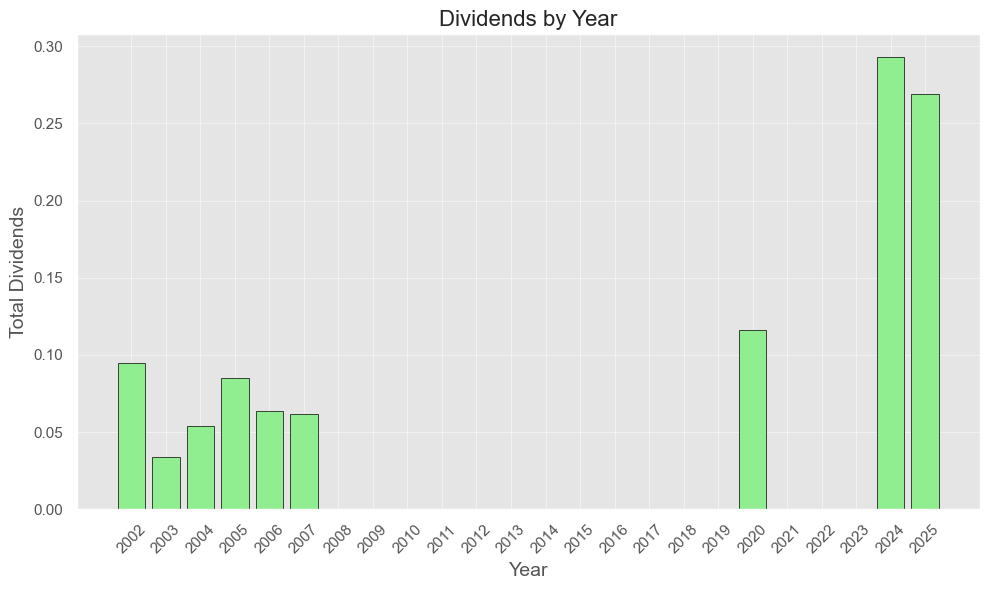

In [30]:
try:
    # Apply a style with more contrast
    plt.style.use("ggplot")
    plt.figure(figsize=(10, 6))

    # Use a more contrasting color for the bars
    plt.bar(df_new_dividends_converted['Year'], df_new_dividends_converted['Dividends'], color='lightgreen', edgecolor='black')

    # Set x-axis ticks to display every year, and rotate them
    plt.xticks(np.arange(df_new_dividends_converted['Year'].min(), df_new_dividends_converted['Year'].max() + 1, 1), rotation=45)

    # Add labels and title
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Total Dividends', fontsize=14)
    plt.title('Dividends by Year', fontsize=16)

    # Improve grid visibility
    plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

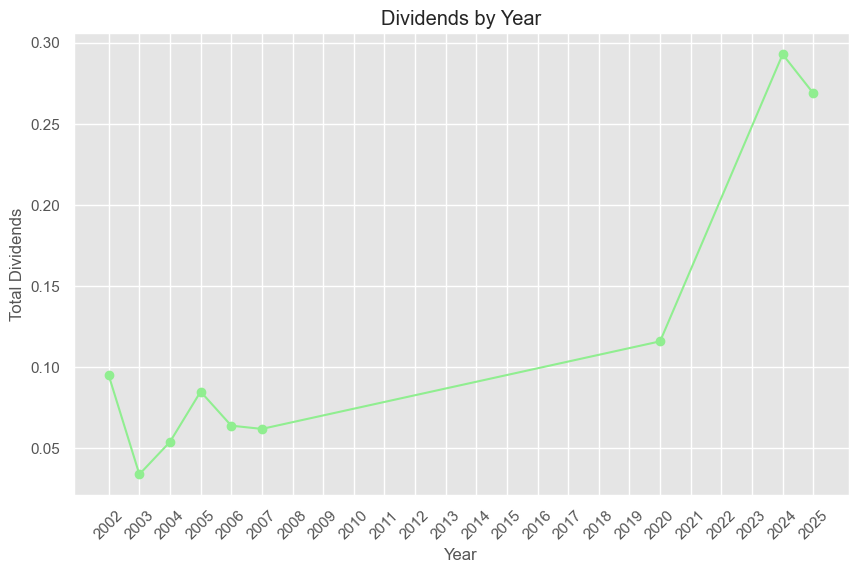

In [31]:
try:   
    # Define the style and figure size
    plt.style.use("ggplot")
    plt.figure(figsize=(10, 6))

    # Plot the data
    plt.plot(df_new_dividends_converted['Year'], df_new_dividends_converted['Dividends'], marker = 'o', color='lightgreen')

    # Set x-axis ticks to display every year between 1 and rotate them
    plt.xticks(np.arange(df_new_dividends_converted['Year'].min(), df_new_dividends_converted['Year'].max() + 1, 1), rotation=45)

    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Total Dividends')
    plt.title('Dividends by Year')

    # Show grid and plot
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

In [32]:
try:
    dividend_Yield = stock_info['dividendYield']
    print(dividend_Yield)
except Exception:
    print("An exception occurred") 

3.47


In [33]:
try:
    trailingAnnualDividendYield = stock_info['trailingAnnualDividendYield']
    print(trailingAnnualDividendYield)
except Exception:
    print("An exception occurred") 

4.118404


In [34]:
try:
    avg_DvidendYield_5_years = stock_info['fiveYearAvgDividendYield']
    print(avg_DvidendYield_5_years)
except Exception:
    print("An exception occurred") 

3.63


In [35]:
try:
    payoutRatio = stock_info['payoutRatio']
    print(payoutRatio)
except Exception:
    print("An exception occurred") 

0.4011


In [36]:
stock.splits

Series([], Name: Stock Splits, dtype: float64)

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 4. Balance Sheet Statement

In [37]:
balance_sheet_df = pd.DataFrame(stock.balance_sheet).astype(float)
balance_sheet_df

,2025-03-31,2024-03-31,2023-03-31,2022-03-31,2021-03-31
Treasury Shares Number,5.611939e+08,6.115229e+08,6.653928e+08,6.682862e+08,NaN
Ordinary Shares Number,1.150652e+10,1.172619e+10,1.202232e+10,1.261371e+10,NaN
Share Issued,1.206771e+10,1.233771e+10,1.268771e+10,1.328200e+10,NaN
Total Debt,2.394016e+13,2.574643e+13,2.242618e+13,1.911247e+13,NaN
Tangible Book Value,1.864484e+13,1.791660e+13,1.587317e+13,1.567955e+13,NaN
Invested Capital,4.446054e+13,4.533440e+13,3.965747e+13,3.613624e+13,NaN
Net Tangible Assets,1.864484e+13,1.791660e+13,1.587317e+13,1.567955e+13,NaN
Capital Lease Obligations,NaN,NaN,NaN,NaN,4.962520e+11
Common Stock Equity,2.052038e+13,1.958797e+13,1.723129e+13,1.702377e+13,NaN
Total Capitalization,3.591258e+13,3.710304e+13,3.398751e+13,3.159792e+13,NaN


In [38]:
balance_sheet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, Treasury Shares Number to Cash Cash Equivalents And Federal Funds Sold
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2025-03-31 00:00:00  56 non-null     float64
 1   2024-03-31 00:00:00  55 non-null     float64
 2   2023-03-31 00:00:00  55 non-null     float64
 3   2022-03-31 00:00:00  55 non-null     float64
 4   2021-03-31 00:00:00  16 non-null     float64
dtypes: float64(5)
memory usage: 3.4+ KB


## 4.1 Retained Earnings

In [39]:
try:
  retained_earnings = balance_sheet_df.loc['Retained Earnings']
  retained_earnings_df = retained_earnings.to_frame(name='Retained Earnings')
  print(retained_earnings_df)
except Exception:
  print("An exception occurred") 

            Retained Earnings
2025-03-31       1.484562e+13
2024-03-31       1.379161e+13
2023-03-31       1.273923e+13
2022-03-31       1.199816e+13
2021-03-31                NaN


In [40]:
try:
    # Calculate percentage changes
    retained_earnings_pct_diff = calculate_pct_diff(balance_sheet_df.loc['Retained Earnings'])
    
    # Convert result into a DataFrame for readability
    retained_earnings_pct_diff_df = pd.DataFrame(
        [retained_earnings_pct_diff],
        columns = balance_sheet_df.columns[:-1],  # Exclude the last column since it has no comparison
        index=['% Change in Retained Earnings']
    )
    print(retained_earnings_pct_diff)
except Exception:
    print("An exception occurred") 
    

[7.642393838339953, 8.260940144881621, 6.176540280311384, nan]


In [41]:
try:
    retained_earnings_pct_diff_df_T  = retained_earnings_pct_diff_df.T
    print(retained_earnings_pct_diff_df_T)
except Exception:
    print("An exception occurred") 

            % Change in Retained Earnings
2025-03-31                       7.642394
2024-03-31                       8.260940
2023-03-31                       6.176540
2022-03-31                            NaN


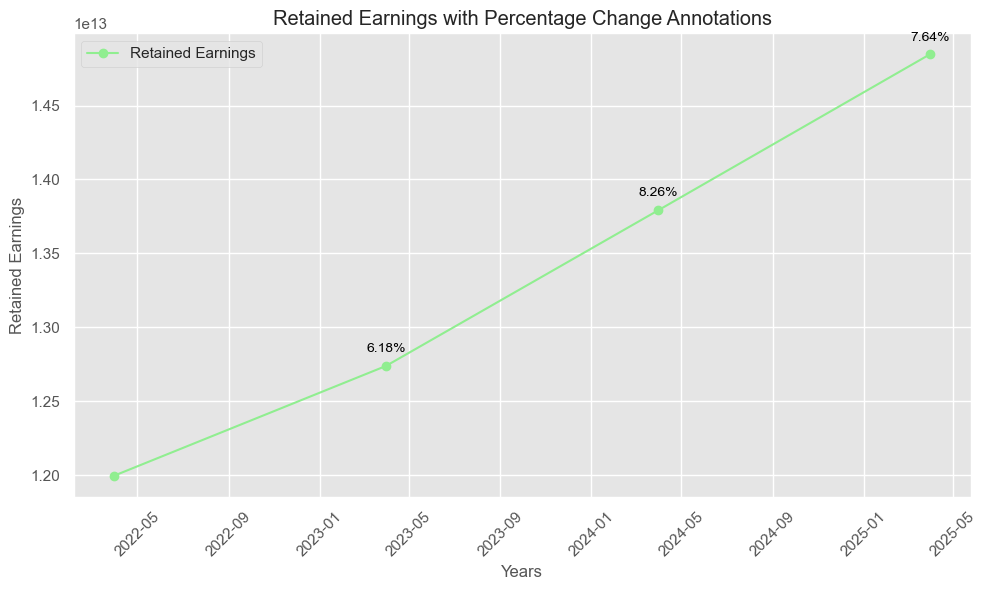

In [42]:
try:
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the Retained Earnings data
    ax.plot(retained_earnings_df.index, retained_earnings_df['Retained Earnings'], marker='o', color='lightgreen', label='Retained Earnings')

    # Annotate the plot with percentage change values from retained_earnings_pct_diff_df_T
    for date, pct_change in retained_earnings_pct_diff_df_T['% Change in Retained Earnings'].items():
        if not pd.isna(pct_change):  # Only annotate if there's a valid percentage change
            ax.annotate(f'{pct_change:.2f}%', 
                        xy=(date, retained_earnings_df.loc[date, 'Retained Earnings']), 
                        xytext=(0, 10),  # Offset to place text above the marker
                        textcoords='offset points',
                        fontsize=10, 
                        color='black', 
                        ha='center')  # Align text horizontally at the center of the point

    # Set labels and title
    plt.xlabel('Years')
    plt.ylabel('Retained Earnings')
    plt.title('Retained Earnings with Percentage Change Annotations')

    # Rotate date labels for better readability
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An exception occurred: {e}")

## 4.2 Liabilities

In [43]:
balance_df_liabilities = balance_sheet_df.loc[['Payables','Current Debt And Capital Lease Obligation','Long Term Debt And Capital Lease Obligation', 'Total Capitalization']]
balance_df_liabilities

,2025-03-31,2024-03-31,2023-03-31,2022-03-31,2021-03-31
Payables,4.937999e+12,7.387495e+12,1.168941e+13,1.281112e+13,NaN
Current Debt And Capital Lease Obligation,8.547968e+12,8.231362e+12,5.669957e+12,4.538322e+12,NaN
Long Term Debt And Capital Lease Obligation,1.539219e+13,1.751507e+13,1.675622e+13,1.457415e+13,NaN
Total Capitalization,3.591258e+13,3.710304e+13,3.398751e+13,3.159792e+13,NaN


In [44]:
pct_diff_balance_df_liabilities = balance_df_liabilities.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_liabilities.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_liabilities.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_liabilities

,2025 vs 2024,2024 vs 2023,2023 vs 2022,2022 vs 2021
Payables,-33.157329,-36.801836,-8.755743,NaN
Current Debt And Capital Lease Obligation,3.846338,45.175034,24.935097,NaN
Long Term Debt And Capital Lease Obligation,-12.120285,4.528754,14.972187,NaN
Total Capitalization,-3.208535,9.166691,7.562481,NaN


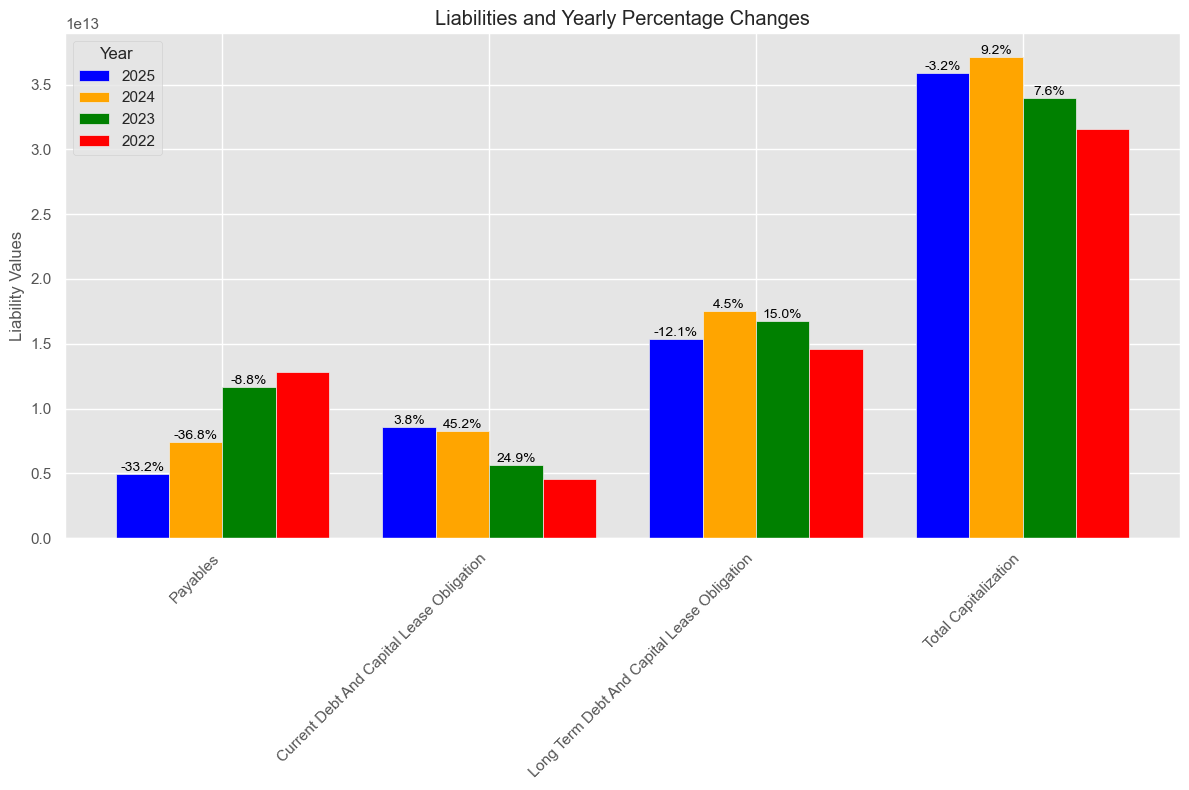

In [45]:
# Format column names
year_columns = [str(col)[:4] for col in balance_df_liabilities.columns]
pct_diff_balance_df_liabilities.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(balance_df_liabilities.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red']

for i, (col, color) in enumerate(zip(balance_df_liabilities.columns[:-1], colors)):
    values = balance_df_liabilities[col]
    ax.bar(x + i * width, values, width=width, label=str(col)[:4], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_liabilities.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_liabilities.index, rotation=45, ha='right')
ax.set_ylabel("Liability Values")
ax.set_title("Liabilities and Yearly Percentage Changes")
ax.legend(title="Year")
plt.tight_layout()
plt.show()

## 4.3 Assets 

In [46]:
balance_df_assets = balance_sheet_df.loc[['Cash Cash Equivalents And Federal Funds Sold','Investments And Advances','Available For Sale Securities','Trading Securities','Net PPE','Goodwill And Other Intangible Assets','Total Assets']]
balance_df_assets

,2025-03-31,2024-03-31,2023-03-31,2022-03-31,2021-03-31
Cash Cash Equivalents And Federal Funds Sold,1.290368e+14,1.295138e+14,1.289180e+14,1.244040e+14,NaN
Investments And Advances,1.045627e+14,1.050565e+14,1.031891e+14,9.684809e+13,NaN
Available For Sale Securities,9.274577e+13,9.466556e+13,9.407208e+13,8.602740e+13,NaN
Trading Securities,1.181696e+13,1.039097e+13,9.117061e+12,1.082069e+13,NaN
Net PPE,1.240103e+12,1.229005e+12,1.220169e+12,1.236010e+12,NaN
Goodwill And Other Intangible Assets,1.875549e+12,1.671371e+12,1.358123e+12,1.344224e+12,NaN
Total Assets,4.131135e+14,4.037031e+14,3.867995e+14,3.737319e+14,NaN


In [47]:
pct_diff_balance_df_assets = balance_df_assets.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_assets.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_assets.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_assets

,2025 vs 2024,2024 vs 2023,2023 vs 2022,2022 vs 2021
Cash Cash Equivalents And Federal Funds Sold,-0.368301,0.462140,3.628525,NaN
Investments And Advances,-0.470031,1.809676,6.547423,NaN
Available For Sale Securities,-2.027974,0.630879,9.351306,NaN
Trading Securities,13.723407,13.972792,-15.744196,NaN
Net PPE,0.903007,0.724162,-1.281624,NaN
Goodwill And Other Intangible Assets,12.216199,23.064774,1.033979,NaN
Total Assets,2.331008,4.370138,3.496508,NaN


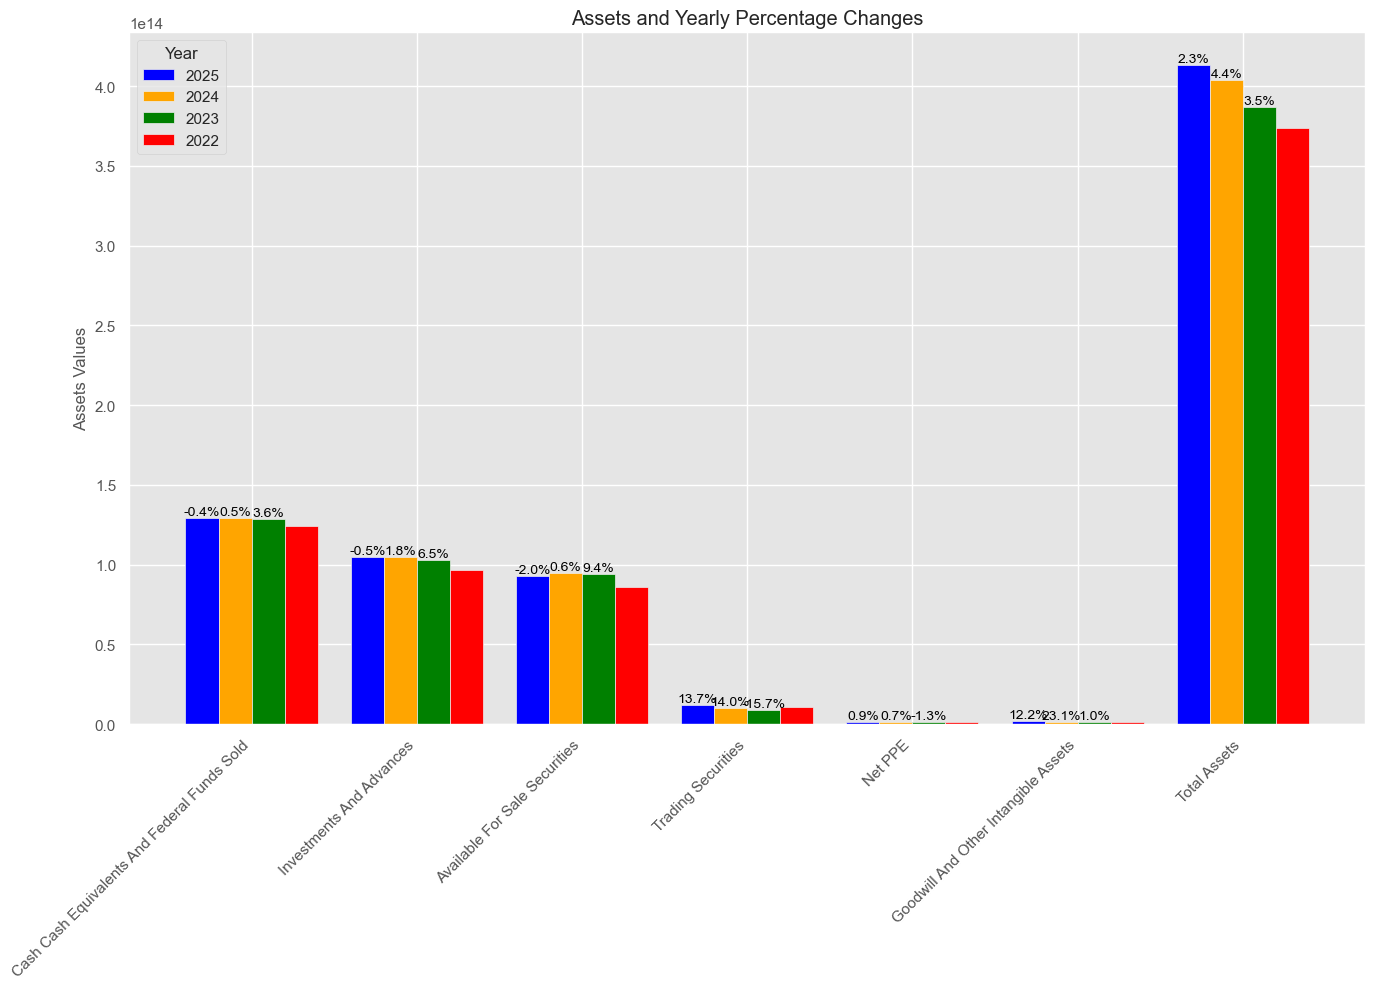

In [48]:
# Format column names
year_columns = [str(col)[:4] for col in balance_df_assets.columns]
pct_diff_balance_df_assets.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
x = np.arange(len(balance_df_assets.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red']

for i, (col, color) in enumerate(zip(balance_df_assets.columns[:-1], colors)):
    values = balance_df_assets[col]
    ax.bar(x + i * width, values, width=width, label=str(col)[:4], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_assets.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_assets.index, rotation=45, ha='right')
ax.set_ylabel("Assets Values")
ax.set_title("Assets and Yearly Percentage Changes")
ax.legend(title="Year")
plt.tight_layout()
plt.show()

## 4.4 Balance Sheet for the last year with Vertical Analysis

In [49]:
balance_sheet_df_last = pd.DataFrame(balance_sheet_df.iloc[:,0])
balance_sheet_df_last

,2025-03-31
Treasury Shares Number,5.611939e+08
Ordinary Shares Number,1.150652e+10
Share Issued,1.206771e+10
Total Debt,2.394016e+13
Tangible Book Value,1.864484e+13
Invested Capital,4.446054e+13
Net Tangible Assets,1.864484e+13
Capital Lease Obligations,NaN
Common Stock Equity,2.052038e+13
Total Capitalization,3.591258e+13


In [50]:
total_assets = balance_sheet_df_last.loc['Total Assets'].values[0]
balance_sheet_df_last['Percentage from Total Assets/Liabilities'] = balance_sheet_df_last.iloc[:, [0]] / total_assets * 100
balance_sheet_df_last

,2025-03-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,5.611939e+08,0.000136
Ordinary Shares Number,1.150652e+10,0.002785
Share Issued,1.206771e+10,0.002921
Total Debt,2.394016e+13,5.795056
Tangible Book Value,1.864484e+13,4.513248
Invested Capital,4.446054e+13,10.762307
Net Tangible Assets,1.864484e+13,4.513248
Capital Lease Obligations,NaN,NaN
Common Stock Equity,2.052038e+13,4.967251
Total Capitalization,3.591258e+13,8.693150


## 4.5 Balance Sheet for the previous year with Vertical Analysis

In [51]:
balance_sheet_df = pd.DataFrame(stock.balance_sheet).astype(float)
balance_sheet_df_prev = pd.DataFrame(balance_sheet_df.iloc[:,1])
balance_sheet_df_prev

,2024-03-31
Treasury Shares Number,6.115229e+08
Ordinary Shares Number,1.172619e+10
Share Issued,1.233771e+10
Total Debt,2.574643e+13
Tangible Book Value,1.791660e+13
Invested Capital,4.533440e+13
Net Tangible Assets,1.791660e+13
Capital Lease Obligations,NaN
Common Stock Equity,1.958797e+13
Total Capitalization,3.710304e+13


In [52]:
total_assets = balance_sheet_df_prev.loc['Total Assets'].values[0]
balance_sheet_df_prev['Percentage from Total Assets/Liabilities'] = balance_sheet_df_prev.iloc[:, [0]] / total_assets * 100
balance_sheet_df_prev

,2024-03-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,6.115229e+08,0.000151
Ordinary Shares Number,1.172619e+10,0.002905
Share Issued,1.233771e+10,0.003056
Total Debt,2.574643e+13,6.377565
Tangible Book Value,1.791660e+13,4.438063
Invested Capital,4.533440e+13,11.229638
Net Tangible Assets,1.791660e+13,4.438063
Capital Lease Obligations,NaN,NaN
Common Stock Equity,1.958797e+13,4.852073
Total Capitalization,3.710304e+13,9.190674


## 4.6 Balance Sheet for the last two years with Vertical Analysis

In [53]:
df_concat_balance = pd.concat([balance_sheet_df_last, balance_sheet_df_prev], axis=1)
df_concat_balance

,2025-03-31 00:00:00,Percentage from Total Assets/Liabilities,2024-03-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,5.611939e+08,0.000136,6.115229e+08,0.000151
Ordinary Shares Number,1.150652e+10,0.002785,1.172619e+10,0.002905
Share Issued,1.206771e+10,0.002921,1.233771e+10,0.003056
Total Debt,2.394016e+13,5.795056,2.574643e+13,6.377565
Tangible Book Value,1.864484e+13,4.513248,1.791660e+13,4.438063
Invested Capital,4.446054e+13,10.762307,4.533440e+13,11.229638
Net Tangible Assets,1.864484e+13,4.513248,1.791660e+13,4.438063
Capital Lease Obligations,NaN,NaN,NaN,NaN
Common Stock Equity,2.052038e+13,4.967251,1.958797e+13,4.852073
Total Capitalization,3.591258e+13,8.693150,3.710304e+13,9.190674


In [54]:
try:
  retained_earnings = df_concat_balance.loc['Retained Earnings'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(retained_earnings)
except Exception:
  print("An exception occurred") 

2025-03-31 00:00:00                         14845617000000.000000
Percentage from Total Assets/Liabilities                 3.593593
2024-03-31 00:00:00                         13791608000000.000000
Percentage from Total Assets/Liabilities                 3.416275
Name: Retained Earnings, dtype: object


In [55]:
df_concat_balance.loc['Cash Cash Equivalents And Federal Funds Sold'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2025-03-31 00:00:00                         129036819000000.000000
Percentage from Total Assets/Liabilities                 31.235198
2024-03-31 00:00:00                         129513820000000.000000
Percentage from Total Assets/Liabilities                 32.081449
Name: Cash Cash Equivalents And Federal Funds Sold, dtype: object

In [56]:
df_concat_balance.loc['Investments And Advances'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2025-03-31 00:00:00                         104562736000000.000000
Percentage from Total Assets/Liabilities                 25.310898
2024-03-31 00:00:00                         105056534000000.000000
Percentage from Total Assets/Liabilities                 26.023214
Name: Investments And Advances, dtype: object

In [57]:
try:
  texes_receivable = df_concat_balance.loc['Invested Capital'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(texes_receivable)
except Exception:
  print("An exception occurred") 

2025-03-31 00:00:00                         44460544000000.000000
Percentage from Total Assets/Liabilities                10.762307
2024-03-31 00:00:00                         45334402000000.000000
Percentage from Total Assets/Liabilities                11.229638
Name: Invested Capital, dtype: object


In [58]:
try:
  account_receivable = df_concat_balance.loc['Net PPE'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(account_receivable)
except Exception:
  print("An exception occurred") 

2025-03-31 00:00:00                         1240103000000.000000
Percentage from Total Assets/Liabilities                0.300185
2024-03-31 00:00:00                         1229005000000.000000
Percentage from Total Assets/Liabilities                0.304433
Name: Net PPE, dtype: object


In [59]:
try:
    goodwill = df_concat_balance.loc['Goodwill'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
    print(goodwill)
except Exception:
    print("An exception occurred") 

2025-03-31 00:00:00                         530386000000.000000
Percentage from Total Assets/Liabilities               0.128387
2024-03-31 00:00:00                         405629000000.000000
Percentage from Total Assets/Liabilities               0.100477
Name: Goodwill, dtype: object


In [60]:
df_concat_balance.loc['Long Term Debt'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2025-03-31 00:00:00                         15392191000000.000000
Percentage from Total Assets/Liabilities                 3.725899
2024-03-31 00:00:00                         17515067000000.000000
Percentage from Total Assets/Liabilities                 4.338601
Name: Long Term Debt, dtype: object

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 5. Cash Flow Statement

In [61]:
cash_flow = stock.cash_flow.astype(float)
cash_flow

,2025-03-31,2024-03-31,2023-03-31,2022-03-31,2021-03-31
Free Cash Flow,-4.502860e+11,-1.030767e+13,1.303015e+13,9.455896e+12,NaN
Repurchase Of Capital Stock,-4.185460e+11,-4.001560e+11,-4.501530e+11,-1.585150e+11,NaN
Repayment Of Debt,-5.389100e+11,-2.232900e+11,-8.157540e+11,-7.894800e+11,NaN
Issuance Of Debt,7.599760e+11,1.115021e+12,6.992460e+11,2.260910e+11,NaN
Issuance Of Capital Stock,1.566100e+10,2.297000e+09,2.237000e+09,5.399000e+09,NaN
Capital Expenditure,-4.567010e+11,-4.628070e+11,-4.016250e+11,-3.840030e+11,NaN
Interest Paid Supplemental Data,NaN,NaN,NaN,NaN,8.799170e+11
Income Tax Paid Supplemental Data,NaN,NaN,NaN,NaN,1.247050e+11
End Cash Position,1.090954e+14,1.098751e+14,1.136302e+14,1.107632e+14,NaN
Other Cash Adjustment Outside Changein Cash,0.000000e+00,4.595000e+09,-1.900000e+09,-3.139000e+09,NaN


## 5.1 Free Cash Flow

In [62]:
free_cash_flow = pd.DataFrame(cash_flow.loc['Free Cash Flow'])
free_cash_flow

,Free Cash Flow
2025-03-31,-4.502860e+11
2024-03-31,-1.030767e+13
2023-03-31,1.303015e+13
2022-03-31,9.455896e+12
2021-03-31,NaN


In [63]:
# Calculate percentage changes
free_cash_flow_pct_diff = calculate_pct_diff(cash_flow.loc['Free Cash Flow'])

# Convert result into a DataFrame for readability
free_cash_flow_pct_diff_df = pd.DataFrame(
    [free_cash_flow_pct_diff],
    columns=cash_flow.columns[:-1],  # Exclude the last column since it has no comparison
    index=['% Change in Free Cash Flow']
)
free_cash_flow_pct_diff_df

,2025-03-31,2024-03-31,2023-03-31,2022-03-31
% Change in Free Cash Flow,-95.631543,-179.106293,37.799189,NaN


In [64]:
free_cash_flow_pct_diff_df_T  = free_cash_flow_pct_diff_df.T
free_cash_flow_pct_diff_df_T

,% Change in Free Cash Flow
2025-03-31,-95.631543
2024-03-31,-179.106293
2023-03-31,37.799189
2022-03-31,NaN


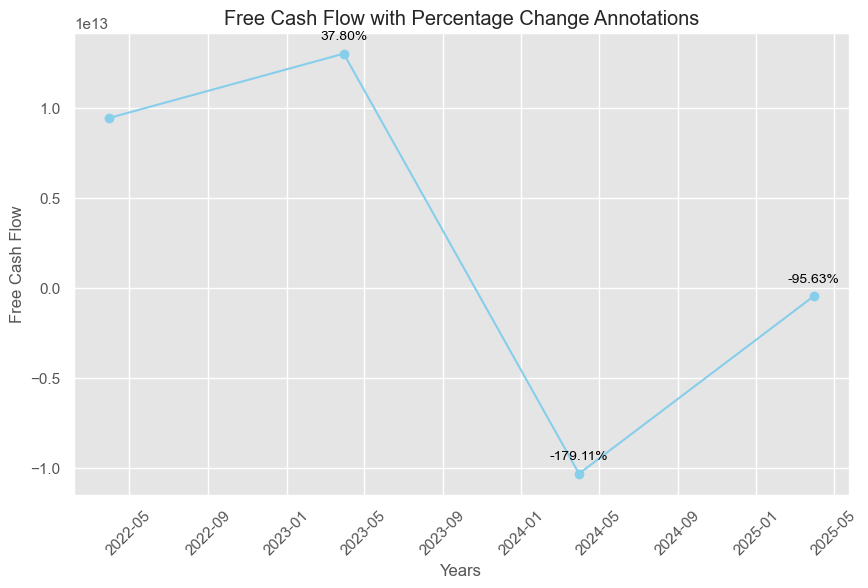

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Free Cash Flow data
ax.plot(free_cash_flow.index, free_cash_flow['Free Cash Flow'], marker = 'o', color = 'skyblue')

# Annotate the plot with percentage change values from free_cash_flow_pct_diff_df_T
for date, pct_change in free_cash_flow_pct_diff_df_T['% Change in Free Cash Flow'].items():
    if not pd.isna(pct_change):  # Only annotate if there's a valid percentage change
        # Adjust the text offset for better visibility below the markers
        ax.annotate(f'{pct_change:.2f}%', 
                    xy=(date, free_cash_flow.loc[date, 'Free Cash Flow']), 
                    xytext=(0, 10),  # Negative vertical offset to place text above the marker
                    textcoords='offset points',
                    fontsize=10, 
                    color='black', 
                    ha='center')  # Align text horizontally at the center of the point

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Free Cash Flow')
plt.title('Free Cash Flow with Percentage Change Annotations')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## 5.2 Cash Flow DF

In [66]:
cash_flow_df = cash_flow.loc[['Operating Cash Flow','Investing Cash Flow', 'Financing Cash Flow']]
cash_flow_df

,2025-03-31,2024-03-31,2023-03-31,2022-03-31,2021-03-31
Operating Cash Flow,6.415000e+09,-9.844860e+12,1.343177e+13,9.839899e+12,NaN
Investing Cash Flow,-1.869480e+11,3.986415e+12,-1.067510e+13,-2.202726e+12,NaN
Financing Cash Flow,-8.611160e+11,8.307000e+09,-9.771380e+11,-1.080428e+12,NaN


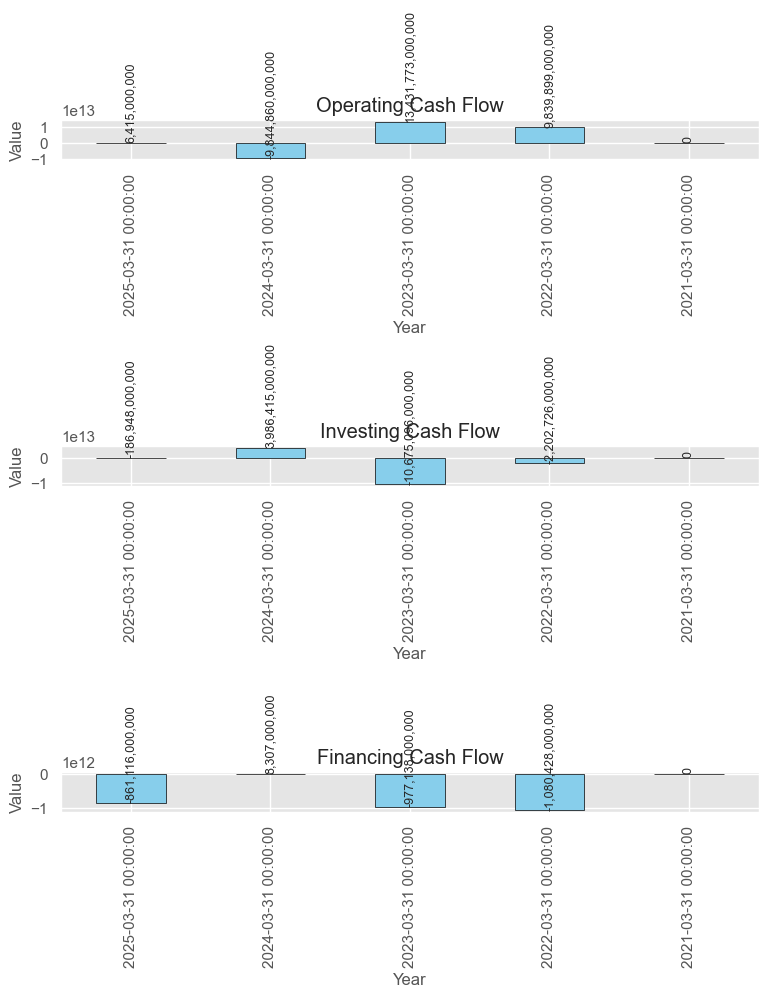

In [67]:
transposed_cash_flow_df = cash_flow_df.T

# Plot each column as a bar plot in subplots
transposed_cash_flow_df.plot(
    kind='bar',
    subplots=True,
    figsize=(8, 10),
    sharex=False,
    sharey=False,
    legend=False,  # Hide legends since column names are the titles
    color='skyblue',
    edgecolor='black',
)

# Add titles and layout adjustments
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(transposed_cash_flow_df.columns[i])  # Set column names as titles
    ax.set_xlabel("Year")
    ax.set_ylabel("Value")
    for bar in ax.patches:
        height = bar.get_height()
        if not pd.isna(height):  # Annotate bar values
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{height:,.0f}",
                ha="center",
                va="bottom",
                fontsize=9,
                rotation=90,
            )

plt.tight_layout()
plt.show()

## 5.3 Percentage changes in Cash Flow DF

In [68]:
pct_diff_cash_flow_df = cash_flow_df.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(cash_flow_df.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_cash_flow_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_cash_flow_df

,2025 vs 2024,2024 vs 2023,2023 vs 2022,2022 vs 2021
Operating Cash Flow,-100.065161,-173.295313,36.503159,NaN
Investing Cash Flow,-104.689627,-137.343130,384.631134,NaN
Financing Cash Flow,-10466.149031,-100.850136,-9.560100,NaN


In [69]:
transposed_pct_diff_cash_flow_df = pct_diff_cash_flow_df.T
transposed_pct_diff_cash_flow_df

,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
2025 vs 2024,-100.065161,-104.689627,-10466.149031
2024 vs 2023,-173.295313,-137.343130,-100.850136
2023 vs 2022,36.503159,384.631134,-9.560100
2022 vs 2021,NaN,NaN,NaN


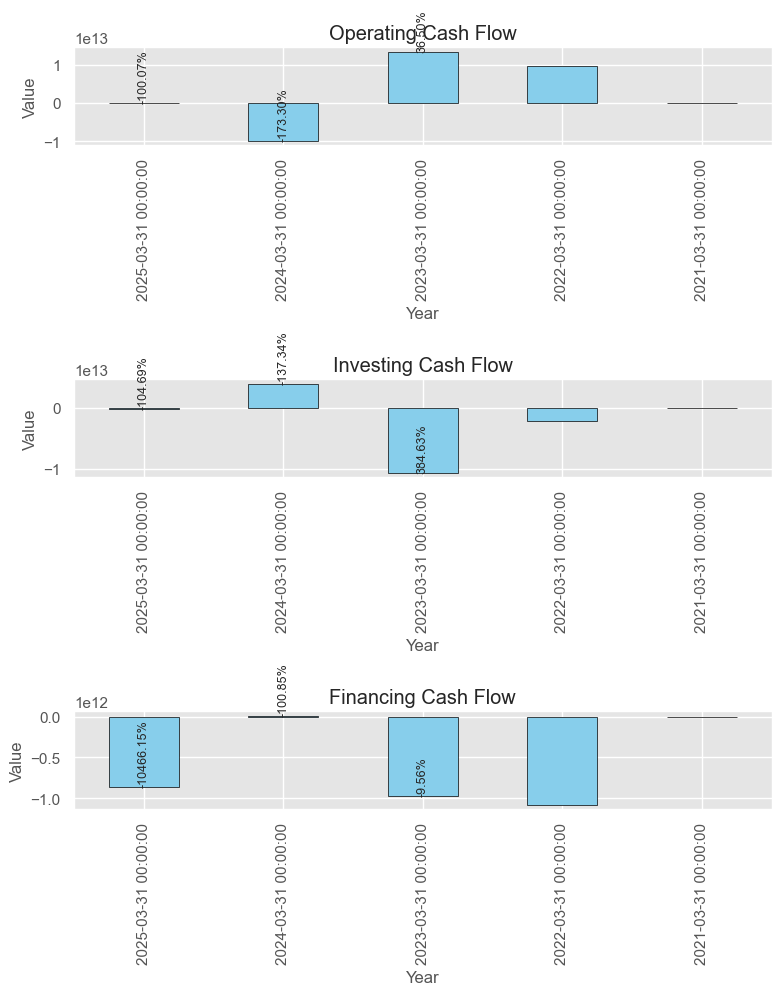

In [70]:
# Remove empty plots if any (subplots with no data)
fig, axes = plt.subplots(figsize=(8, 10), nrows=transposed_cash_flow_df.shape[1], ncols=1)

# Plot the raw cash flow data (values) and percentage changes
for i, ax in enumerate(axes):
    if i < transposed_cash_flow_df.shape[1]:  # Ensure we're within bounds
        # Plot each row (corresponding to a year) as a bar plot
        transposed_cash_flow_df.iloc[:, i].plot(
            kind='bar',
            ax=ax,
            color='skyblue',
            edgecolor='black',
            legend=False,
        )

        # Set the title and labels
        ax.set_title(transposed_cash_flow_df.columns[i])  # Set the title for each subplot
        ax.set_xlabel("Year")
        ax.set_ylabel("Value")

        # Add annotations for percentage changes
        for j, bar in enumerate(ax.patches):
            height = bar.get_height()

            if not pd.isna(height):  # Check if the value is not NaN
                # Extract the corresponding percentage change
                if j < len(transposed_pct_diff_cash_flow_df.index) and i < len(transposed_pct_diff_cash_flow_df.columns):
                    pct_change = transposed_pct_diff_cash_flow_df.iloc[j, i]  # Correct row and column access
                else:
                    pct_change = None

                if pd.notna(pct_change):  # Only annotate if the percentage change is available
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_height(),
                        f"{pct_change:.2f}%",  # Annotation with percentage change
                        ha="center",
                        va="bottom",
                        fontsize=9,
                        rotation=90,
                    )

plt.tight_layout()
plt.show()

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 6. Income Statement

In [71]:
income_statement = pd.DataFrame(stock.income_stmt).astype(float)
income_statement

,2025-03-31,2024-03-31,2023-03-31,2022-03-31,2021-03-31
Tax Effect Of Unusual Items,-2.832478e+10,-1.807002e+10,1.922200e+09,-1.180141e+10,NaN
Tax Rate For Calcs,2.388000e-01,2.333000e-01,3.500000e-03,2.470000e-01,NaN
Total Unusual Items,-1.186130e+11,-7.745400e+10,5.492000e+11,-4.777900e+10,NaN
Total Unusual Items Excluding Goodwill,-1.186130e+11,-7.745400e+10,5.492000e+11,-4.777900e+10,NaN
Net Income From Continuing Operation Net Minority Interest,1.862946e+12,1.490781e+12,1.116496e+12,1.130840e+12,NaN
Reconciled Depreciation,4.150290e+11,3.623670e+11,3.346360e+11,3.632500e+11,NaN
Net Interest Income,2.876456e+12,2.457576e+12,2.926209e+12,2.043488e+12,NaN
Interest Expense,5.591261e+12,5.011100e+12,2.372731e+12,5.439520e+11,NaN
Interest Income,8.467717e+12,7.468676e+12,5.298940e+12,2.587440e+12,NaN
Normalized Income,1.953234e+12,1.550165e+12,5.692182e+11,1.166818e+12,NaN


## 6.1 Income Statement DF

In [72]:
income_statement_df = income_statement.loc[['Total Revenue','General And Administrative Expense','Net Income Common Stockholders',
                                                'Diluted EPS']]
income_statement_df

,2025-03-31,2024-03-31,2023-03-31,2022-03-31,2021-03-31
Total Revenue,6.838439e+12,5.879775e+12,6.057232e+12,4.703324e+12,NaN
General And Administrative Expense,3.166035e+12,2.920875e+12,2.969325e+12,2.746840e+12,NaN
Net Income Common Stockholders,1.862946e+12,1.490781e+12,1.116496e+12,1.130840e+12,NaN
Diluted EPS,1.594700e+02,1.243200e+02,9.041000e+01,8.805000e+01,NaN


In [73]:
pct_diff_income_statement_df = income_statement_df.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(income_statement_df.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_income_statement_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_income_statement_df

,2025 vs 2024,2024 vs 2023,2023 vs 2022,2022 vs 2021
Total Revenue,16.304433,-2.929672,28.786195,NaN
General And Administrative Expense,8.393375,-1.631684,8.099671,NaN
Net Income Common Stockholders,24.964431,33.523183,-1.268438,NaN
Diluted EPS,28.273810,37.506913,2.680295,NaN


In [74]:
transposed_df_income = income_statement_df.T
transposed_df_income

,Total Revenue,General And Administrative Expense,Net Income Common Stockholders,Diluted EPS
2025-03-31,6.838439e+12,3.166035e+12,1.862946e+12,159.47
2024-03-31,5.879775e+12,2.920875e+12,1.490781e+12,124.32
2023-03-31,6.057232e+12,2.969325e+12,1.116496e+12,90.41
2022-03-31,4.703324e+12,2.746840e+12,1.130840e+12,88.05
2021-03-31,NaN,NaN,NaN,NaN


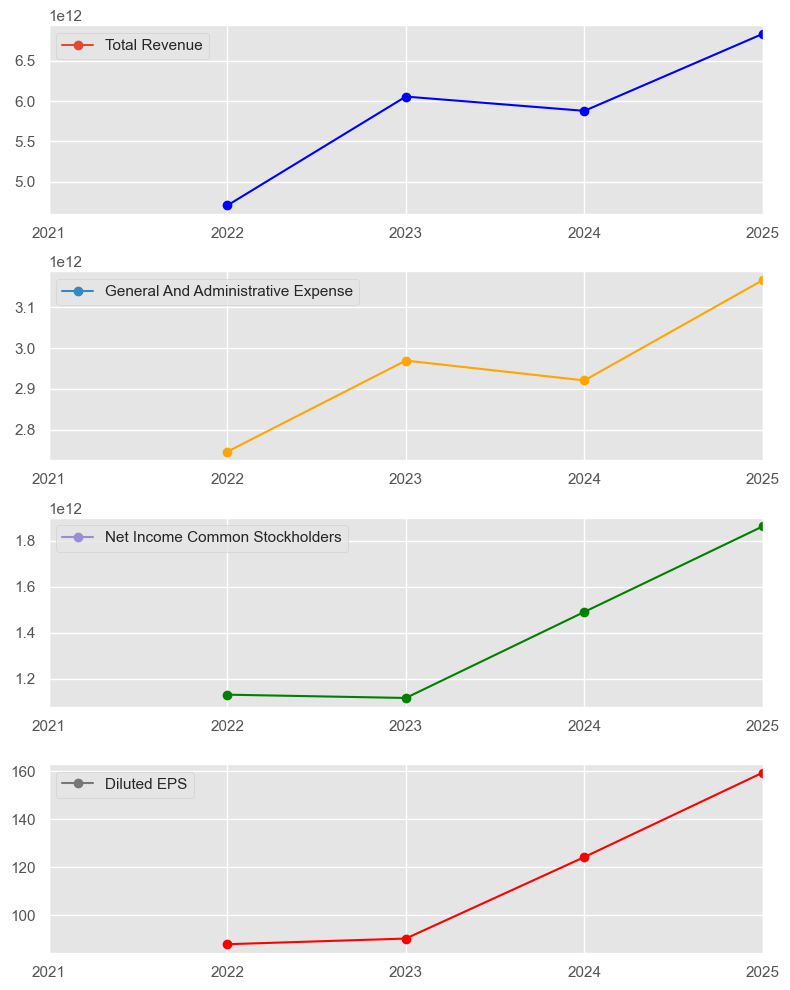

In [75]:
# Create subplots and assign unique colors
ax = transposed_df_income.plot(kind='line', marker='o', subplots=True, figsize=(8, 10), sharex=False, sharey=False)

# Assign distinct colors
for idx, axis in enumerate(ax):  # Loop through subplots
    color = colors[idx % len(colors)]  # Cycle through colors if needed
    for line in axis.get_lines():
        line.set_color(color)  # Apply unique color to each subplot

plt.tight_layout()
plt.show()

## 6.2 Percentage changes in Income Statement DF

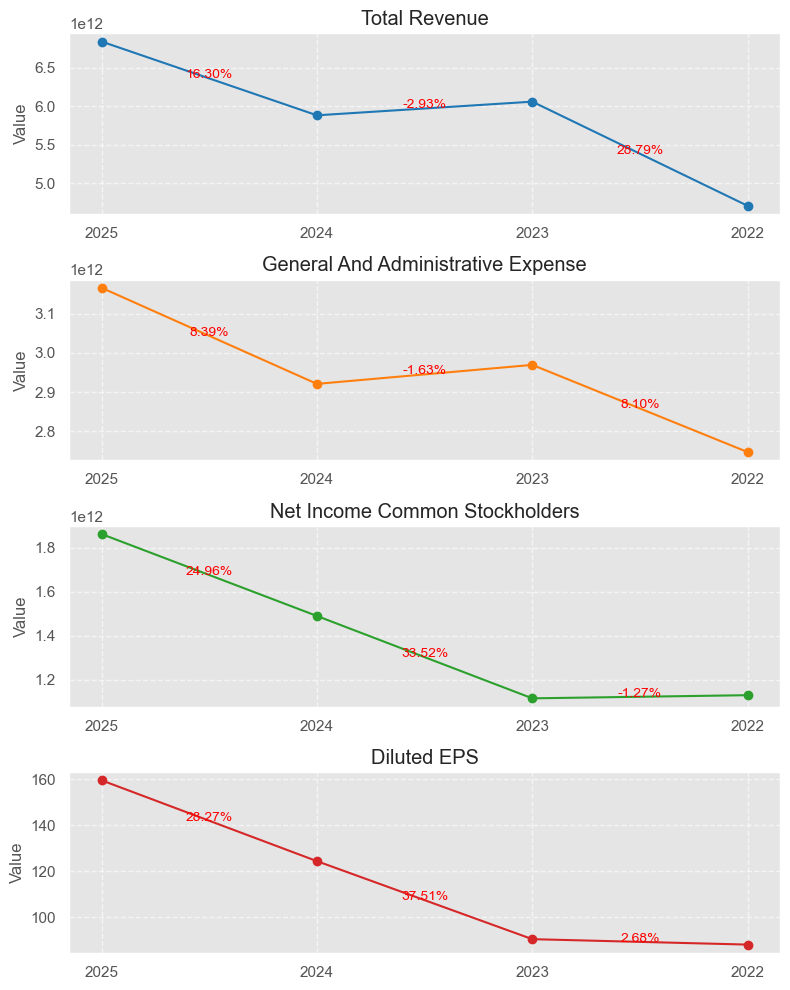

In [76]:
# Convert column names to years
years = [str(col.year) for col in income_statement_df.columns]

# Define colors
colors = plt.cm.tab10.colors

# Plot each row separately
fig, axes = plt.subplots(nrows=len(income_statement_df), figsize=(8, 10), sharex=False, sharey=False)

for idx, (ax, (row, values)) in enumerate(zip(axes, income_statement_df.iterrows())):
    color = colors[idx % len(colors)]  # Assign unique color
    ax.plot(years, values, marker='o', linestyle='-', label=row, color=color)
    ax.set_title(row)
    ax.set_ylabel("Value")
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Add percentage annotations
    pct_changes = pct_diff_income_statement_df.loc[row].values  # Convert to array for indexing
    for i in range(len(pct_changes)):
        if not np.isnan(pct_changes[i]):
            ax.text(i + 0.5, (values.iloc[i] + values.iloc[i+1]) / 2, f"{pct_changes[i]:.2f}%", 
                    fontsize=10, color='red', ha='center')

plt.tight_layout()
plt.show()

## 6.3 Income Statement for the last year with Vertical Analysis

In [77]:
income_statement_last = pd.DataFrame(income_statement.iloc[:,0])
income_statement_last

,2025-03-31
Tax Effect Of Unusual Items,-2.832478e+10
Tax Rate For Calcs,2.388000e-01
Total Unusual Items,-1.186130e+11
Total Unusual Items Excluding Goodwill,-1.186130e+11
Net Income From Continuing Operation Net Minority Interest,1.862946e+12
Reconciled Depreciation,4.150290e+11
Net Interest Income,2.876456e+12
Interest Expense,5.591261e+12
Interest Income,8.467717e+12
Normalized Income,1.953234e+12


In [78]:
revenue = income_statement_last.loc['Operating Revenue'].values[0]
income_statement_last['Percentage from Operating Revenue'] = income_statement_last.iloc[:, [0]] / revenue * 100
income_statement_last

,2025-03-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,-2.832478e+10,-4.141996e-01
Tax Rate For Calcs,2.388000e-01,3.492025e-12
Total Unusual Items,-1.186130e+11,-1.734504e+00
Total Unusual Items Excluding Goodwill,-1.186130e+11,-1.734504e+00
Net Income From Continuing Operation Net Minority Interest,1.862946e+12,2.724227e+01
Reconciled Depreciation,4.150290e+11,6.069060e+00
Net Interest Income,2.876456e+12,4.206305e+01
Interest Expense,5.591261e+12,8.176224e+01
Interest Income,8.467717e+12,1.238253e+02
Normalized Income,1.953234e+12,2.856257e+01


## 6.4 Income Statement for the previous year with Vertical Analysis

In [79]:
income_statement_prev = pd.DataFrame(income_statement.iloc[:,1])
income_statement_prev

,2024-03-31
Tax Effect Of Unusual Items,-1.807002e+10
Tax Rate For Calcs,2.333000e-01
Total Unusual Items,-7.745400e+10
Total Unusual Items Excluding Goodwill,-7.745400e+10
Net Income From Continuing Operation Net Minority Interest,1.490781e+12
Reconciled Depreciation,3.623670e+11
Net Interest Income,2.457576e+12
Interest Expense,5.011100e+12
Interest Income,7.468676e+12
Normalized Income,1.550165e+12


In [80]:
revenue = income_statement_prev.loc['Operating Revenue'].values[0]
income_statement_prev['Percentage from Operating Revenue'] = income_statement_prev.iloc[:, [0]] / revenue * 100
income_statement_prev

,2024-03-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,-1.807002e+10,-3.073250e-01
Tax Rate For Calcs,2.333000e-01,3.967839e-12
Total Unusual Items,-7.745400e+10,-1.317295e+00
Total Unusual Items Excluding Goodwill,-7.745400e+10,-1.317295e+00
Net Income From Continuing Operation Net Minority Interest,1.490781e+12,2.535439e+01
Reconciled Depreciation,3.623670e+11,6.162940e+00
Net Interest Income,2.457576e+12,4.179711e+01
Interest Expense,5.011100e+12,8.522605e+01
Interest Income,7.468676e+12,1.270232e+02
Normalized Income,1.550165e+12,2.636436e+01


## 6.5 Income Statement for the last two years with Vertical Analysis

In [81]:
df_concat_income = pd.concat([income_statement_last, income_statement_prev], axis=1)
df_concat_income

,2025-03-31 00:00:00,Percentage from Operating Revenue,2024-03-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,-2.832478e+10,-4.141996e-01,-1.807002e+10,-3.073250e-01
Tax Rate For Calcs,2.388000e-01,3.492025e-12,2.333000e-01,3.967839e-12
Total Unusual Items,-1.186130e+11,-1.734504e+00,-7.745400e+10,-1.317295e+00
Total Unusual Items Excluding Goodwill,-1.186130e+11,-1.734504e+00,-7.745400e+10,-1.317295e+00
Net Income From Continuing Operation Net Minority Interest,1.862946e+12,2.724227e+01,1.490781e+12,2.535439e+01
Reconciled Depreciation,4.150290e+11,6.069060e+00,3.623670e+11,6.162940e+00
Net Interest Income,2.876456e+12,4.206305e+01,2.457576e+12,4.179711e+01
Interest Expense,5.591261e+12,8.176224e+01,5.011100e+12,8.522605e+01
Interest Income,8.467717e+12,1.238253e+02,7.468676e+12,1.270232e+02
Normalized Income,1.953234e+12,2.856257e+01,1.550165e+12,2.636436e+01


In [82]:
df_concat_income.loc['Operating Revenue'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2025-03-31 00:00:00                  6838439000000.000000
Percentage from Operating Revenue              100.000000
2024-03-31 00:00:00                  5879775000000.000000
Percentage from Operating Revenue              100.000000
Name: Operating Revenue, dtype: object

In [83]:
df_concat_income.loc['General And Administrative Expense'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)


2025-03-31 00:00:00                  3166035000000.000000
Percentage from Operating Revenue               46.297627
2024-03-31 00:00:00                  2920875000000.000000
Percentage from Operating Revenue               49.676646
Name: General And Administrative Expense, dtype: object

In [84]:
df_concat_income.loc['Net Income Common Stockholders'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2025-03-31 00:00:00                  1862946000000.000000
Percentage from Operating Revenue               27.242270
2024-03-31 00:00:00                  1490781000000.000000
Percentage from Operating Revenue               25.354389
Name: Net Income Common Stockholders, dtype: object

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 7. Ratio Analysis

__Net Profit Margin%__

In [85]:
net_profit_margin = (income_statement.loc['Net Income'].replace(0, np.nan).astype(float)/ income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float)) * 100
net_profit_margin

2025-03-31    27.242270
2024-03-31    25.354389
2023-03-31    18.432446
2022-03-31    24.043421
2021-03-31          NaN
dtype: float64

__ROA%__

In [86]:
net_income = income_statement.loc['Net Income'].replace(0, np.nan).astype(float)
avg_assets = balance_sheet_df.loc['Total Assets'].replace(0, np.nan).astype(float).mean()
ROA = net_income / avg_assets  * 100
ROA

2025-03-31    0.472425
2024-03-31    0.378047
2023-03-31    0.283132
2022-03-31    0.286770
2021-03-31         NaN
Name: Net Income, dtype: float64

__Asset Turnover%__

In [87]:
asset_turnover = income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float) / avg_assets * 100
asset_turnover

2025-03-31    1.734161
2024-03-31    1.491053
2023-03-31    1.536055
2022-03-31    1.192717
2021-03-31         NaN
Name: Total Revenue, dtype: float64

__Equity Ratio%__

In [88]:
equity_ratio = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)/balance_sheet_df.loc['Total Assets'].replace(0, np.nan).astype(float) * 100
equity_ratio

2025-03-31    4.967251
2024-03-31    4.852073
2023-03-31    4.454838
2022-03-31    4.555076
2021-03-31         NaN
dtype: float64

__Leverage__

If Leverage = 1, it means that the assets are financed entirely with equity (no debt). <br>
If Leverage = 20, it means that for every 1 unit of equity, the company has 20 units of assets – the rest is financed with debt.

In [89]:
leverage = balance_sheet_df.loc['Total Assets'].replace(0, np.nan).astype(float) / balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
leverage

2025-03-31    20.131859
2024-03-31    20.609746
2023-03-31    22.447504
2022-03-31    21.953530
2021-03-31          NaN
dtype: float64

__Cost-to-Income Ratio%__

A lower C/I ratio → the company is more efficient, spending less for each unit of revenue. <br>
A higher C/I ratio → the company spends more relative to its revenue, which may indicate inefficiency. <br>
A good C/I ratio is usually between 40% and 60%.

In [90]:
operating_expenses = (
    income_statement.loc['Selling General And Administration'].fillna(0).astype(float) +
    income_statement.loc['Other Non Interest Expense'].fillna(0).astype(float) +
    income_statement.loc['Reconciled Depreciation'].fillna(0).astype(float)
)
operating_expenses

2025-03-31    5.072447e+12
2024-03-31    4.148476e+12
2023-03-31    5.122127e+12
2022-03-31    3.639099e+12
2021-03-31    0.000000e+00
dtype: float64

In [91]:
operating_income = income_statement_df.loc['Total Revenue'].astype(float)
operating_income

2025-03-31    6.838439e+12
2024-03-31    5.879775e+12
2023-03-31    6.057232e+12
2022-03-31    4.703324e+12
2021-03-31             NaN
Name: Total Revenue, dtype: float64

In [92]:
cost_to_income_ratio = operating_expenses / operating_income * 100
cost_to_income_ratio

2025-03-31    74.175510
2024-03-31    70.555013
2023-03-31    84.562173
2022-03-31    77.372918
2021-03-31          NaN
dtype: float64

__Capital Adequacy Ratio%__

A higher CAR → the bank is more stable, having more capital to cover potential losses. <br>
A lower CAR → the bank is riskier and may face problems under financial stress. <br>
Basel standards for minimum CAR → minimum 8%–10.5%, depending on additional buffers.

In [93]:
tier1_capital = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
tier1_capital

2025-03-31    2.052038e+13
2024-03-31    1.958797e+13
2023-03-31    1.723129e+13
2022-03-31    1.702377e+13
2021-03-31             NaN
Name: Common Stock Equity, dtype: float64

In [94]:
rwa_proxy = balance_sheet_df.loc['Total Assets'].astype(float) * 0.5  
rwa_proxy

2025-03-31    2.065568e+14
2024-03-31    2.018516e+14
2023-03-31    1.933997e+14
2022-03-31    1.868660e+14
2021-03-31             NaN
Name: Total Assets, dtype: float64

In [95]:
CAR_proxy = (tier1_capital / rwa_proxy) * 100
CAR_proxy

2025-03-31    9.934502
2024-03-31    9.704147
2023-03-31    8.909676
2022-03-31    9.110152
2021-03-31         NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 8. ROIC_bank & WACC

__ROIC_bank__

In [96]:
net_income = income_statement.loc['Net Income']
net_income

2025-03-31    1.862946e+12
2024-03-31    1.490781e+12
2023-03-31    1.116496e+12
2022-03-31    1.130840e+12
2021-03-31             NaN
Name: Net Income, dtype: float64

In [97]:
invested_capital = balance_sheet_df.loc["Common Stock Equity"].astype(float)
invested_capital

2025-03-31    2.052038e+13
2024-03-31    1.958797e+13
2023-03-31    1.723129e+13
2022-03-31    1.702377e+13
2021-03-31             NaN
Name: Common Stock Equity, dtype: float64

In [98]:
ROIC_bank = net_income / invested_capital
ROIC_bank

2025-03-31    0.090785
2024-03-31    0.076107
2023-03-31    0.064795
2022-03-31    0.066427
2021-03-31         NaN
dtype: float64

__WACC__

In [99]:
def calculate_wacc(E, D, Ke, Kd, tax_rate):
    equity_weight = E / (E + D)
    debt_weight = D / (E + D)
    wacc = (equity_weight * Ke) + (debt_weight * Kd) * (1 - tax_rate)
    return wacc

In [100]:
E = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
D = balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float)
Ke = 0.1
Kd = 0.06
tax_rate = 0.3

In [101]:
wacc_result = calculate_wacc(E, D, Ke, Kd, tax_rate)
wacc_result

2025-03-31    0.075141
2024-03-31    0.072620
2023-03-31    0.071405
2022-03-31    0.073248
2021-03-31         NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 9. Reinvestment Rate & Growth Rate%

In [102]:
net_income = income_statement.loc['Net Income'].replace(0, np.nan).astype(float)
net_income

2025-03-31    1.862946e+12
2024-03-31    1.490781e+12
2023-03-31    1.116496e+12
2022-03-31    1.130840e+12
2021-03-31             NaN
Name: Net Income, dtype: float64

In [103]:
dividends = df_new_dividends_converted['Dividends'].replace(0, np.nan).astype(float).tail(1).item()
dividends

0.269

In [104]:
reinvestment_rate = (net_income - dividends)  / net_income
reinvestment_rate

2025-03-31    1.0
2024-03-31    1.0
2023-03-31    1.0
2022-03-31    1.0
2021-03-31    NaN
Name: Net Income, dtype: float64

In [105]:
growth_rate = (reinvestment_rate * ROIC_bank) * 100
growth_rate 

2025-03-31    9.078514
2024-03-31    7.610696
2023-03-31    6.479468
2022-03-31    6.642711
2021-03-31         NaN
dtype: float64

In [106]:
expected_growth_rate = (reinvestment_rate * ROIC_bank).mean() * 100
expected_growth_rate

7.452847079027642

__The growth rate represents the sustainable rate at which a company can grow its operating profit (NOPAT) over time without raising new capital (i.e., only reinvesting internally generated cash).__

__Growth Rate Range	Interpretation for banks <br>
0% – 5%	Healthy growth — strong reinvestment or high efficiency. Good sign if sustainable.<br>
< 0%	Negative growth — shrinking operations, divestitures, or declining efficiency. Could be strategic (e.g., refocusing), or a red flag.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 10. Dividend Coverage Ratio

In [107]:
EPS = income_statement.loc['Basic EPS'].replace(0, np.nan).astype(float)
EPS

2025-03-31    160.01
2024-03-31    124.64
2023-03-31     90.72
2022-03-31     88.44
2021-03-31       NaN
Name: Basic EPS, dtype: float64

In [108]:
df_new_dividends_converted

,Year,Dividends
0,2002,0.095
1,2003,0.034
2,2004,0.054
3,2005,0.085
4,2006,0.064
5,2007,0.062
6,2020,0.116
7,2024,0.293
8,2025,0.269


__DCR > 2.0 — Very safe dividend. The company earns at least twice what it pays out.__<br>
__DCR ≈ 1.5 – 2.0 — Generally safe, but less buffer.__<br>
__DCR < 1.0 — Warning sign. The company is paying out more in dividends than it earns, which is unsustainable long-term (may rely on debt or reserves).__<br>

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 11. Long-term Debt to Equity Ratio & Net Interest Margin%

__DE__

In [109]:
long_term_debt = balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float)
long_term_debt

2025-03-31    1.539219e+13
2024-03-31    1.751507e+13
2023-03-31    1.675622e+13
2022-03-31    1.457415e+13
2021-03-31             NaN
Name: Long Term Debt, dtype: float64

In [110]:
equity = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
equity

2025-03-31    2.052038e+13
2024-03-31    1.958797e+13
2023-03-31    1.723129e+13
2022-03-31    1.702377e+13
2021-03-31             NaN
Name: Common Stock Equity, dtype: float64

In [111]:
debt_equity_ratio = long_term_debt / equity
debt_equity_ratio

2025-03-31    0.750093
2024-03-31    0.894175
2023-03-31    0.972430
2022-03-31    0.856106
2021-03-31         NaN
dtype: float64

__Net Interest Margin%__

In [112]:
net_interest_income = income_statement.loc['Net Interest Income'].astype(float)
net_interest_income

2025-03-31    2.876456e+12
2024-03-31    2.457576e+12
2023-03-31    2.926209e+12
2022-03-31    2.043488e+12
2021-03-31             NaN
Name: Net Interest Income, dtype: float64

In [113]:
earning_assets = balance_sheet_df.loc['Total Assets'].astype(float)
earning_assets

2025-03-31    4.131135e+14
2024-03-31    4.037031e+14
2023-03-31    3.867995e+14
2022-03-31    3.737319e+14
2021-03-31             NaN
Name: Total Assets, dtype: float64

In [114]:
average_assets = earning_assets.mean()
average_assets

394337008750000.0

In [115]:
NIM = (net_interest_income / average_assets) * 100
NIM

2025-03-31    0.729441
2024-03-31    0.623217
2023-03-31    0.742058
2022-03-31    0.518209
2021-03-31         NaN
Name: Net Interest Income, dtype: float64

__How much interest income the bank generates for every unit of assets. <br>
3%–4% Healthy NIM. Indicates that the bank efficiently manages the difference between its interest income and interest expenses. <br>
< 3% Low NIM. May signal high funding costs or low interest income.<br> > 4% High NIM. May indicate the bank has a competitive advantage, but it could also result from taking higher risk.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 12. Operating Cash to Total Liabilities%

In [116]:
operating_cash = cash_flow.loc['Operating Cash Flow']
operating_cash

2025-03-31    6.415000e+09
2024-03-31   -9.844860e+12
2023-03-31    1.343177e+13
2022-03-31    9.839899e+12
2021-03-31             NaN
Name: Operating Cash Flow, dtype: float64

In [117]:
total_liabilities = balance_sheet_df.loc["Total Liabilities Net Minority Interest"] 
total_liabilities

2025-03-31    3.913854e+14
2024-03-31    3.829562e+14
2023-03-31    3.685266e+14
2022-03-31    3.557437e+14
2021-03-31             NaN
Name: Total Liabilities Net Minority Interest, dtype: float64

In [118]:
operating_cash_To_total_liabilities = (operating_cash / total_liabilities) * 100
operating_cash_To_total_liabilities

2025-03-31    0.001639
2024-03-31   -2.570754
2023-03-31    3.644723
2022-03-31    2.766008
2021-03-31         NaN
dtype: float64

__≈ 3%–7% Healthy ratio. Indicates that the bank generates enough operating cash relative to its huge obligations (including deposits). <br>
≈ 1%–3% Moderate ratio. Not critical, but shows that cash flow is lower relative to liabilities → the trend should be monitored. <br>
< 1% Poor. A signal of potential liquidity issues or dependence on external financing.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 13. Operating Cash to Market capitalization%

In [119]:
operating_cash_last = cash_flow.loc['Operating Cash Flow'].iloc[0] / 1e9 / 145  # divide by 1e9 for billions, 145 JPY/USD
operating_cash_last

0.04424137931034483

In [120]:
operating_cash_To_market_cap = (operating_cash_last / market_cap) * 100
operating_cash_To_market_cap

2.5433698563525428e-11

In [121]:
dif_for_non_current_assets = market_cap - operating_cash_last # in USD
dif_for_non_current_assets

173947879423.95575

In [122]:
real_non_current_assets = balance_sheet_df.iloc[:,0].loc['Total Assets'] - balance_sheet_df.iloc[:,0].loc['Cash Cash Equivalents And Federal Funds Sold'] / 145
real_non_current_assets

412223591903448.25

__~ 3%–10%  Healthy. The bank generates enough cash relative to its market value. Signals strong operational efficiency and liquidity. <br>
~ 1%–3% Moderate. Cash generation is lower relative to market value → watch trends over time. <br>
< 1% Poor. Bank generates very little cash relative to market cap → may indicate liquidity risk or operational stress.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 14. Operating Cash to Net Income%

In [123]:
operating_cash

2025-03-31    6.415000e+09
2024-03-31   -9.844860e+12
2023-03-31    1.343177e+13
2022-03-31    9.839899e+12
2021-03-31             NaN
Name: Operating Cash Flow, dtype: float64

In [124]:
net_income = income_statement_df.loc['Net Income Common Stockholders'].replace(0, np.nan).astype(float)
net_income

2025-03-31    1.862946e+12
2024-03-31    1.490781e+12
2023-03-31    1.116496e+12
2022-03-31    1.130840e+12
2021-03-31             NaN
Name: Net Income Common Stockholders, dtype: float64

In [125]:
operating_cash_To_net_income = (operating_cash / net_income) * 100
operating_cash_To_net_income

2025-03-31       0.344347
2024-03-31    -660.382712
2023-03-31    1203.029209
2022-03-31     870.140692
2021-03-31            NaN
dtype: float64

__> 100% Strong cash flow. The company generates more cash than its reported net income (good for financial health).__ <br>
__≈ 100% Net income and cash flow are closely aligned, suggesting good earnings quality.__ <br>
__< 100% Earnings are higher than cash flow. Possible reasons: aggressive revenue recognition, high non-cash expenses, or rising working capital.__ <br>
__< 0 (negative)	Operating cash flow is negative, meaning the company burns cash while reporting net income (could signal financial distress).__


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font>

# 15. The Bank Z-score

In [149]:
def calculate_bank_z_score(balance_sheet, income_statement, roa_std_dev=0.05):
    # Convert column names to strings for consistent access
    balance_sheet_cols = [str(col) for col in balance_sheet.columns]
    income_statement_cols = [str(col) for col in income_statement.columns]
    
    results = pd.DataFrame(index=balance_sheet_cols)
    
    for i, year in enumerate(balance_sheet.columns):
        year_str = str(year)
        try:
            # Get total assets - using the correct column name from your data
            total_assets = balance_sheet.loc['Total Assets', year_str]
            
            # Get equity - trying multiple possible names from your data
            equity_alternatives = [
                'Total Equity Gross Minority Interest',
                'Common Stock Equity',
                'Stockholders Equity',
                'Net Tangible Assets',
                'Tangible Book Value'
            ]
            
            equity_value = None
            equity_name = None
            for equity_item in equity_alternatives:
                if equity_item in balance_sheet.index:
                    value = balance_sheet.loc[equity_item, year_str]
                    if not pd.isna(value) and value != 0:
                        equity_value = value
                        equity_name = equity_item
                        break
            
            if equity_value is None:
                print(f"No valid equity measure found for {year_str}")
                continue
            
            # Get net income - trying multiple possible names
            net_income_alternatives = [
                'Net Income',
                'Net Income Common Stockholders',
                'Net Income From Continuing Operation Net Minority Interest'
            ]
            
            net_income = None
            net_income_name = None
            for income_item in net_income_alternatives:
                if income_item in income_statement.index:
                    value = income_statement.loc[income_item, year_str]
                    if not pd.isna(value) and value != 0:
                        net_income = value
                        net_income_name = income_item
                        break
            
            if net_income is None:
                print(f"No valid net income measure found for {year_str}")
                continue
            
            # Get net interest income - trying multiple possible names
            nii_alternatives = [
                'Net Interest Income',
                'Interest Income'  # Using Interest Income as fallback
            ]
            
            net_interest_income = None
            nii_name = None
            for nii_item in nii_alternatives:
                if nii_item in income_statement.index:
                    value = income_statement.loc[nii_item, year_str]
                    if not pd.isna(value) and value != 0:
                        net_interest_income = value
                        nii_name = nii_item
                        break
            
            if net_interest_income is None:
                print(f"No net interest income measure found for {year_str}")
                continue
            
            # Calculate bank-specific ratios
            K1 = equity_value / total_assets  # Capital Adequacy Ratio
            K2 = net_income / total_assets    # Return on Assets (ROA)
            K3 = net_interest_income / total_assets  # Net Interest Margin efficiency
            
            # Calculate Bank Z-score (modified version)
            Z = (K1 + K2 + K3) / roa_std_dev
            
            # Store results
            results.loc[year_str, 'Z-score'] = Z
            results.loc[year_str, 'K1 (Equity/TA)'] = K1
            results.loc[year_str, 'K2 (ROA)'] = K2
            results.loc[year_str, 'K3 (NII/TA)'] = K3
            results.loc[year_str, 'Total Assets'] = total_assets
            results.loc[year_str, 'Equity'] = equity_value
            results.loc[year_str, 'Net Income'] = net_income
            results.loc[year_str, 'Net Interest Income'] = net_interest_income
            results.loc[year_str, 'ROA Std Dev Used'] = roa_std_dev
            results.loc[year_str, 'Status'] = 'Very Safe' if Z > 10 else 'Safe' if Z > 5 else 'Moderate' if Z > 3 else 'Risky'
            results.loc[year_str, 'Equity Measure'] = equity_name
            results.loc[year_str, 'Income Measure'] = net_income_name
            results.loc[year_str, 'NII Measure'] = nii_name
            
        except KeyError as e:
            print(f"Missing data for {year_str}: {e}")
            continue
        except Exception as e:
            print(f"Error processing {year_str}: {e}")
            continue
    
    return results

In [150]:
z_scores = calculate_bank_z_score(balance_sheet_df, income_statement)

print("Altman Z-score Analysis with Automatic Equity Detection:")
print("=" * 60)
print(z_scores.round(3))

No valid equity measure found for 2021-03-31
Altman Z-score Analysis with Automatic Equity Detection:
            Z-score  K1 (Equity/TA)  K2 (ROA)  K3 (NII/TA)  Total Assets  \
2025-03-31    1.281           0.053     0.005        0.007  4.131135e+14   
2024-03-31    1.223           0.051     0.004        0.006  4.037031e+14   
2023-03-31    1.154           0.047     0.003        0.008  3.867995e+14   
2022-03-31    1.133           0.048     0.003        0.005  3.737319e+14   
2021-03-31      NaN             NaN       NaN          NaN           NaN   

                  Equity    Net Income  Net Interest Income  ROA Std Dev Used  \
2025-03-31  2.172813e+13  1.862946e+12         2.876456e+12              0.05   
2024-03-31  2.074698e+13  1.490781e+12         2.457576e+12              0.05   
2023-03-31  1.827286e+13  1.116496e+12         2.926209e+12              0.05   
2022-03-31  1.798824e+13  1.130840e+12         2.043488e+12              0.05   
2021-03-31           NaN           N

__Components of the Bank Z-Score: <br>__
   __1. K1 = Equity / Total Assets (Capital Adequacy Ratio)<br>
    What it measures: The proportion of a bank's assets financed by shareholder equity. It is a key indicator of financial leverage and buffer against losses.<br>
    Normal Values: 5% - 15% for healthy banks.<br>
    Interpretation: Higher values indicate a stronger capital base, meaning the bank is better able to absorb losses and is less reliant on debt.__
    
  __2. K2 = Net Income / Total Assets (Return on Assets - ROA)<br>
    What it measures: The profitability and efficiency of a bank's use of its assets to generate earnings.<br>
    Normal Values: 0.5% - 1.5% for healthy banks.<br>
    Interpretation: Higher values indicate better profitability and more efficient management of the bank's asset base.<br>__
    
  __3. K3 = Net Interest Income / Total Assets (Net Interest Margin Efficiency)<br>
    What it measures: The core efficiency of the bank's primary business: earning interest on its assets (loans, securities) relative to its funding costs.<br>
    Normal Values: 1% - 3% for healthy banks.<br>
    Interpretation: Higher values indicate a stronger fundamental business model and better ability to generate core banking revenue__

__Interpretation of Z-Score Results: <br>
    Z > 10: Very Safe Zone - Very low risk of insolvency.<br>
    Z > 5: Safe Zone - Low risk.<br>
    Z > 3: Gray Zone / Moderate Risk - Acceptable but should be monitored.<br>
    Z ≤ 3: Distress Zone - High risk of insolvency.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font>